Implementing Batch Normalization:

In [27]:
# Import Statements:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.datasets import make_classification

# Creating the sequential neural network model:
model = Sequential()
model.add(Dense(10, input_shape=(60, ), activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

early_stopping_criteria = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='adam', loss='binary_crossentropy')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                610       
_________________________________________________________________
batch_normalization_14 (Batc (None, 10)                40        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_15 (Batc (None, 10)                40        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 811
Trainable params: 771
Non-trainable params: 40
_________________________________________________________________


In [28]:
# Creating the input dataset:
# Creating the classification dataset:
x_train, y_train = make_classification(n_samples=1000, n_features=60, n_classes=2, random_state=1024)
print("Training Dimensions", x_train.shape, y_train.shape)

x_test, y_test = make_classification(n_samples=10, n_features=60, n_classes=2, random_state=231)
print("Test Dimensions", x_test.shape, y_test.shape)


Training Dimensions (1000, 60) (1000,)
Test Dimensions (10, 60) (10,)


In [29]:
model_history = model.fit(x_train, y_train, epochs=45, validation_data=(x_test, y_test), callbacks=[early_stopping_criteria])

Epoch 1/45
32/32 [==============================] - 1s 7ms/step - loss: 0.6856 - val_loss: 0.6815
Epoch 2/45
32/32 [==============================] - 0s 4ms/step - loss: 0.5749 - val_loss: 0.6587
Epoch 3/45
32/32 [==============================] - 0s 3ms/step - loss: 0.5034 - val_loss: 0.6415
Epoch 4/45
32/32 [==============================] - 0s 3ms/step - loss: 0.4600 - val_loss: 0.6273
Epoch 5/45
32/32 [==============================] - 0s 3ms/step - loss: 0.4273 - val_loss: 0.6111
Epoch 6/45
32/32 [==============================] - 0s 3ms/step - loss: 0.3975 - val_loss: 0.6180
Epoch 7/45
32/32 [==============================] - 0s 3ms/step - loss: 0.3737 - val_loss: 0.6177
Epoch 8/45
32/32 [==============================] - 0s 3ms/step - loss: 0.3700 - val_loss: 0.6364
Epoch 9/45
32/32 [==============================] - 0s 3ms/step - loss: 0.3615 - val_loss: 0.6516
Epoch 10/45
32/32 [==============================] - 0s 3ms/step - loss: 0.3554 - val_loss: 0.6878
Epoch 11/45
32/32 [

<AxesSubplot:title={'center':'Training vs Validation Loss'}>

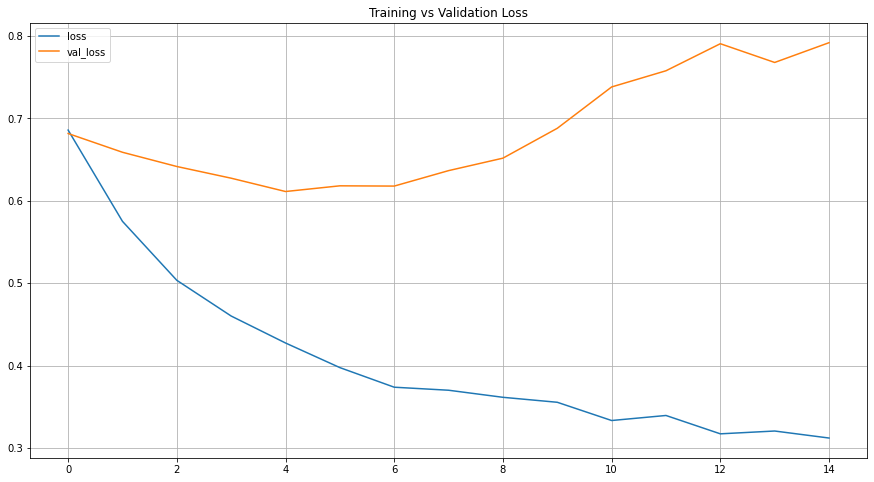

In [30]:
model_metrics = pd.DataFrame(model_history.history)
model_metrics.plot(title="Training vs Validation Loss", figsize=(15, 8), grid=True)

Experimenting with the batch size:

In [34]:
#batch_size = 1
model_history = model.fit(x_train, y_train, epochs=45, validation_data=(x_test, y_test), callbacks=[early_stopping_criteria], batch_size=1)


Epoch 1/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6948 - val_loss: 7.2788
Epoch 2/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6942 - val_loss: 10.7615
Epoch 3/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6941 - val_loss: 8.2181
Epoch 4/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6941 - val_loss: 7.5370
Epoch 5/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6940 - val_loss: 7.8260
Epoch 6/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6941 - val_loss: 7.4511
Epoch 7/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6939 - val_loss: 10.7032
Epoch 8/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6937 - val_loss: 10.3605
Epoch 9/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6937 - val_loss: 9.2191
Epoch 10/45
1000/1000 [==============================] - 2s 2ms/step - loss: 0.

With a batch size of 1, the weights are updated with each observation that is passed as an input to the neural network.

<AxesSubplot:title={'center':'Training vs Validation Loss'}>

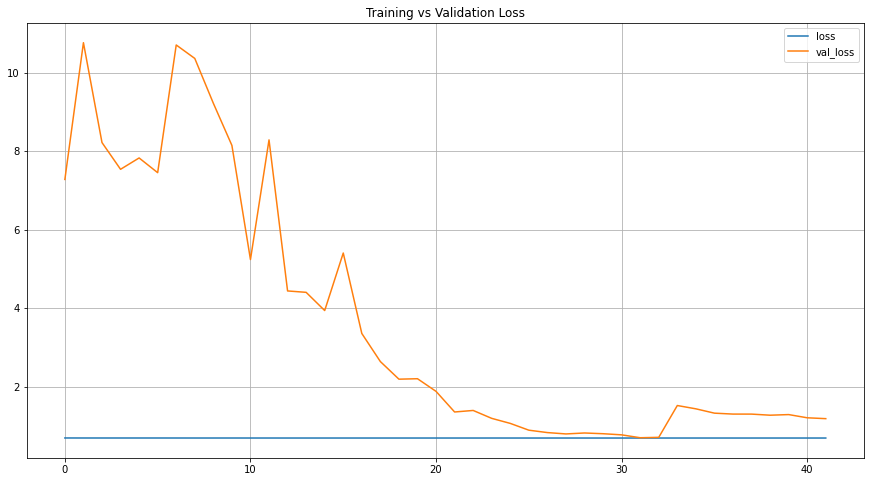

In [35]:
model_metrics = pd.DataFrame(model_history.history)
model_metrics.plot(title="Training vs Validation Loss", figsize=(15, 8), grid=True)

In [37]:
model.evaluate(x_train, y_train)

32/32 [==============================] - 0s 1ms/step - loss: 1.0752


1.0751967430114746

The model overfits.

In [38]:
#batch_size = 1000 # The size of the no. of rows in the data.
model_history = model.fit(x_train, y_train, epochs=45, validation_data=(x_test, y_test), callbacks=[early_stopping_criteria], batch_size=1000)

Epoch 1/45
1/1 [==============================] - 0s 252ms/step - loss: 0.7108 - val_loss: 1.0444
Epoch 2/45
1/1 [==============================] - 0s 23ms/step - loss: 0.7033 - val_loss: 0.9699
Epoch 3/45
1/1 [==============================] - 0s 26ms/step - loss: 0.6930 - val_loss: 0.9261
Epoch 4/45
1/1 [==============================] - 0s 19ms/step - loss: 0.6807 - val_loss: 0.8974
Epoch 5/45
1/1 [==============================] - 0s 24ms/step - loss: 0.6670 - val_loss: 0.8761
Epoch 6/45
1/1 [==============================] - 0s 21ms/step - loss: 0.6522 - val_loss: 0.8590
Epoch 7/45
1/1 [==============================] - 0s 28ms/step - loss: 0.6364 - val_loss: 0.8448
Epoch 8/45
1/1 [==============================] - 0s 18ms/step - loss: 0.6199 - val_loss: 0.8337
Epoch 9/45
1/1 [==============================] - 0s 28ms/step - loss: 0.6026 - val_loss: 0.8271
Epoch 10/45
1/1 [==============================] - 0s 20ms/step - loss: 0.5848 - val_loss: 0.8269
Epoch 11/45
1/1 [===========

With a batch size equal to the number of rows/observations in the training data, the weights are updated once per epoch.

<AxesSubplot:title={'center':'Training vs Validation Loss'}>

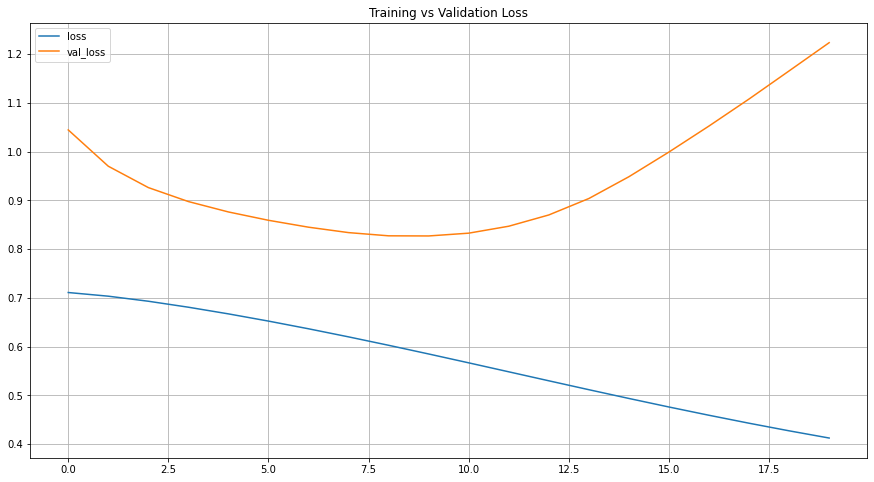

In [39]:
model_metrics = pd.DataFrame(model_history.history)
model_metrics.plot(title="Training vs Validation Loss", figsize=(15, 8), grid=True)

In [40]:
model.evaluate(x_train, y_train)

32/32 [==============================] - 0s 2ms/step - loss: 0.2837


0.28365370631217957

The model does not overfit, but it underfits.